In [60]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

What makes a greate wine?

In [2]:
red = Table.read_table('winequality-red.csv')
red.show(10)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5


In [3]:
red.sort("free sulfur dioxide", "total sulfur dioxide")

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5.9,0.29,0.25,13.4,0.067,72,160,0.99721,3.33,0.54,10.3,6
6.6,0.735,0.02,7.9,0.122,68,124,0.9994,3.47,0.53,9.9,5
6.6,0.735,0.02,7.9,0.122,68,124,0.9994,3.47,0.53,9.9,5
6.9,0.63,0.33,6.7,0.235,66,115,0.99787,3.22,0.56,9.5,5
5.9,0.19,0.21,1.7,0.045,57,135,0.99341,3.32,0.44,9.5,5
10.2,0.54,0.37,15.4,0.214,55,95,1.00369,3.18,0.77,9,6
10.2,0.54,0.37,15.4,0.214,55,95,1.00369,3.18,0.77,9,6
11.8,0.33,0.49,3.4,0.093,54,80,1.0002,3.3,0.76,10.7,7
8.6,0.22,0.36,1.9,0.064,53,77,0.99604,3.47,0.87,11,7
7.4,0.64,0.17,5.4,0.168,52,98,0.99736,3.28,0.5,9.5,5


In [4]:
red.where("free sulfur dioxide", are.below(80))

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5


In [5]:
red.where("total sulfur dioxide", are.below(170))

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5


In [6]:
rwine = red.select('alcohol', 'density', 'quality')

In [7]:
high_quality = red.with_column( 
    'High Quality',
    red.column('quality') >= 7)
high_quality

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,High Quality
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,False
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,False
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,False
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,False
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,False
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,False
7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5,False
7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7,True
7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7,True
7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5,False


In [8]:
red.group('quality')

quality,count
3,10
4,53
5,681
6,638
7,199
8,18


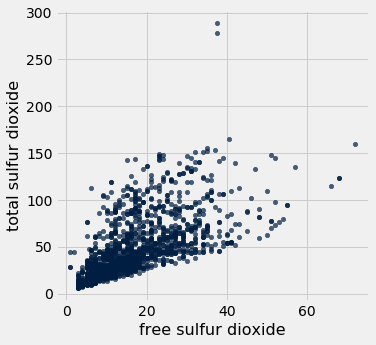

In [9]:
red.scatter("free sulfur dioxide", "total sulfur dioxide")

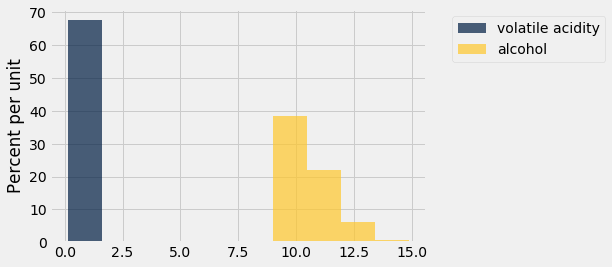

In [10]:
red.hist('volatile acidity', 'alcohol')

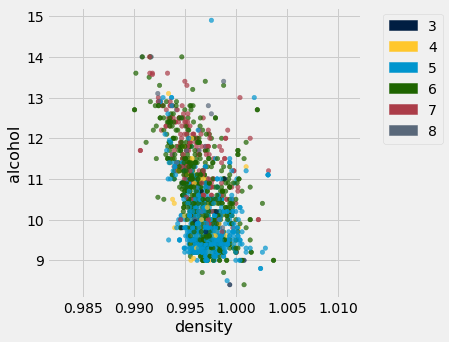

In [36]:
red.scatter('density', 'alcohol', colors='quality')

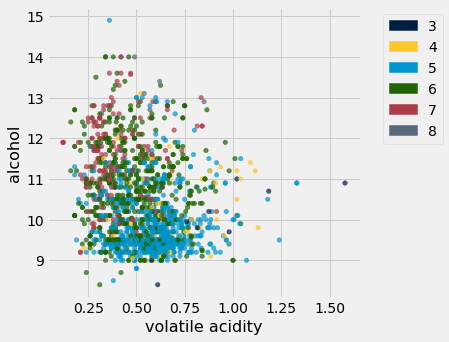

In [45]:
red.scatter('volatile acidity', 'alcohol', colors='quality')

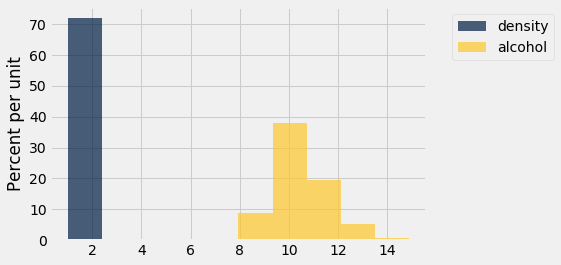

In [35]:
red.hist('density', 'alcohol')

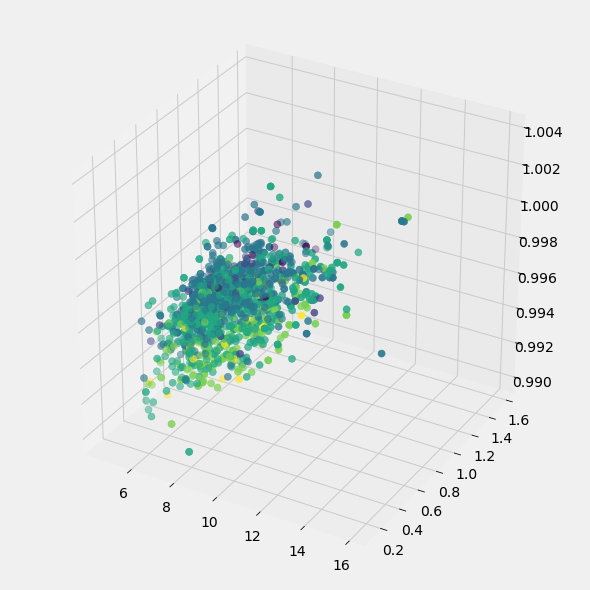

In [40]:
fig= plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(red.column('fixed acidity'),
          red.column('volatile acidity'),
          red.column('density'),
          c=red.column('quality'),
          cmap='viridis',
          s=50);

In [14]:
red.group('free sulfur dioxide')

free sulfur dioxide,count
1,3
2,1
3,49
4,41
5,104
5.5,1
6,138
7,71
8,56
9,62


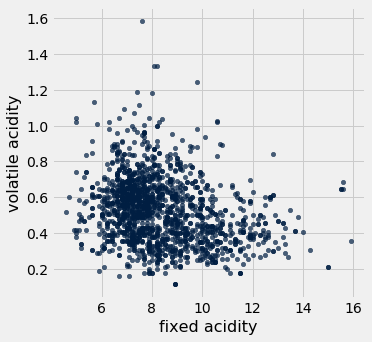

In [15]:
red.scatter("fixed acidity", "volatile acidity")

In [16]:
red.group('volatile acidity')

volatile acidity,count
0.12,3
0.16,2
0.18,10
0.19,2
0.2,3
0.21,6
0.22,6
0.23,5
0.24,13
0.25,7


In [17]:
red.group('alcohol')

alcohol,count
8.4,2
8.5,1
8.7,2
8.8,2
9,30
9.05,1
9.1,23
9.2,72
9.23333,1
9.25,1


In [18]:
# correlation function
def compute_feature_correlations(table, target_col='quality'):
    """
    Returns a table showing the correlation of each numeric feature with the target column.
    """
    correlations = {}
    for label in table.labels:
        if label != target_col and table.column(label).dtype in [np.float64, np.int64]:
            corr = np.corrcoef(table.column(label), table.column(target_col))[0, 1]
            correlations[label] = corr
    sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
    return Table().with_columns(
        'Feature', [x[0] for x in sorted_corr],
        'Correlation with Quality', [x[1] for x in sorted_corr]
    )


corr_results = compute_feature_correlations(high_quality)
corr_results.show()

Feature,Correlation with Quality
alcohol,0.476166
volatile acidity,-0.390558
sulphates,0.251397
citric acid,0.226373
total sulfur dioxide,-0.1851
density,-0.174919
chlorides,-0.128907
fixed acidity,0.124052
pH,-0.0577314
free sulfur dioxide,-0.0506561


In [19]:
#prediction function
def predict_high_quality_by_alcohol(table, threshold=10.5):
    """
    Predicts high-quality wine (1) if alcohol >= threshold, else 0.
    Returns prediction accuracy.
    """
    actual = table.column('High Quality')
    alcohol = table.column('alcohol')
    predicted = (alcohol >= threshold).astype(int)
    accuracy = np.mean(predicted == actual)
    return accuracy


accuracy = predict_high_quality_by_alcohol(high_quality, threshold=10.5)
print(f" Prediction Accuracy using alcohol >= 10.5 as rule: {accuracy:.2%}")

 Prediction Accuracy using alcohol >= 10.5 as rule: 67.23%


In [20]:
white = Table.read_table('winequality-white.csv')
white

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6


In [21]:
high_quality = white.with_column( 
    'High Quality',
    white.column('quality') >= 7)
high_quality

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,High Quality
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6,False
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6,False
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6,False
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,False
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,False
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6,False
6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6,False
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6,False
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6,False
8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6,False


In [22]:
white.group('quality')

quality,count
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


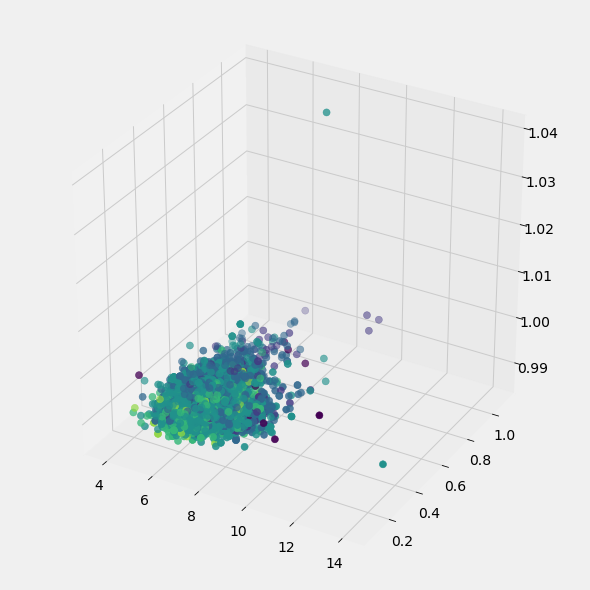

In [39]:
fig= plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(white.column('fixed acidity'),
          white.column('volatile acidity'),
         white.column('density'),
          c=white.column('quality'),
          cmap='viridis',
          s=50);

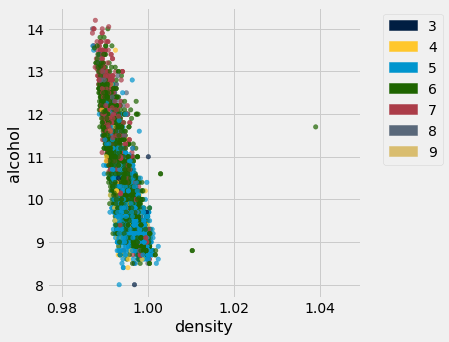

In [38]:
white.scatter('density', 'alcohol', colors='quality')

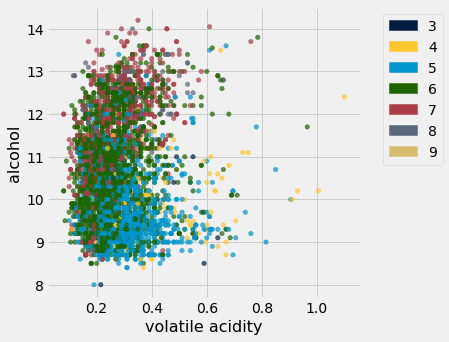

In [44]:
white.scatter('volatile acidity', 'alcohol', colors='quality')

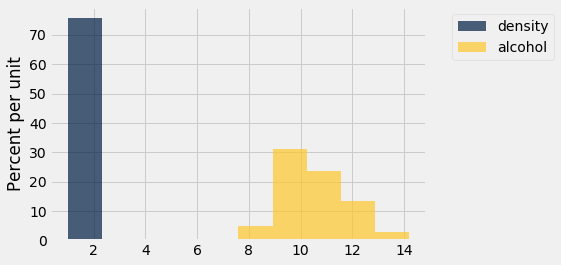

In [43]:
white.hist('density', 'alcohol')

In [25]:
white.group('free sulfur dioxide')

free sulfur dioxide,count
2,1
3,10
4,11
5,25
6,32
7,25
8,35
9,29
10,55
11,45


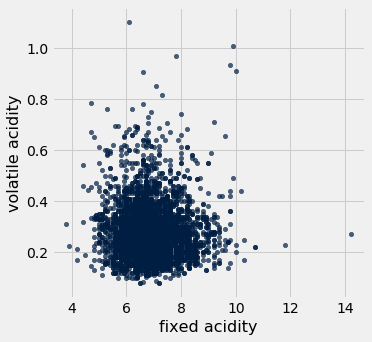

In [26]:
white.scatter("fixed acidity", "volatile acidity")

In [27]:
white.group('volatile acidity')

volatile acidity,count
0.08,4
0.085,1
0.09,1
0.1,6
0.105,6
0.11,13
0.115,3
0.12,34
0.125,3
0.13,44


In [31]:
white.group('density')

density,count
0.98711,1
0.98713,1
0.98722,1
0.9874,1
0.98742,2
0.98746,2
0.98758,1
0.98774,1
0.98779,1
0.98794,2


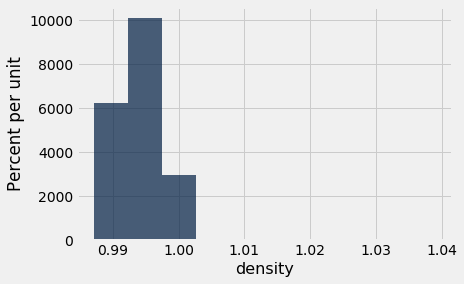

In [32]:
white.hist('density')

In [28]:
white.group('alcohol')

alcohol,count
8,2
8.4,3
8.5,9
8.6,23
8.7,78
8.8,107
8.9,95
9,185
9.1,144
9.2,199


In [29]:
# correlation function
def compute_feature_correlations(table, target_col='quality'):
    """
    Returns a table showing the correlation of each numeric feature with the target column.
    """
    correlations = {}
    for label in table.labels:
        if label != target_col and table.column(label).dtype in [np.float64, np.int64]:
            corr = np.corrcoef(table.column(label), table.column(target_col))[0, 1]
            correlations[label] = corr
    sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
    return Table().with_columns(
        'Feature', [x[0] for x in sorted_corr],
        'Correlation with Quality', [x[1] for x in sorted_corr]
    )


corr_results = compute_feature_correlations(high_quality)
corr_results.show()

Feature,Correlation with Quality
alcohol,0.435575
density,-0.307123
chlorides,-0.209934
volatile acidity,-0.194723
total sulfur dioxide,-0.174737
fixed acidity,-0.113663
pH,0.0994272
residual sugar,-0.0975768
sulphates,0.0536779
citric acid,-0.00920909


In [30]:
#prediction function
def predict_high_quality_by_alcohol(table, threshold=10.5):
    """
    Predicts high-quality wine (1) if alcohol >= threshold, else 0.
    Returns prediction accuracy.
    """
    actual = table.column('High Quality')
    alcohol = table.column('alcohol')
    predicted = (alcohol >= threshold).astype(int)
    accuracy = np.mean(predicted == actual)
    return accuracy


accuracy = predict_high_quality_by_alcohol(high_quality, threshold=10.5)
print(f" Prediction Accuracy using alcohol >= 10.5 as rule: {accuracy:.2%}")

 Prediction Accuracy using alcohol >= 10.5 as rule: 65.15%


In [52]:
red = Table.read_table('winequality-red.csv').with_column('Type', 'Red')

In [53]:
white = Table.read_table('winequality-white.csv').with_column('Type', 'White')

In [54]:
combined = red.append(white)

In [55]:
print(combined.labels)

('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Type')


In [56]:
red_wine = combined.where('Type', 'Red')
white_wine = combined.where('Type', 'White')

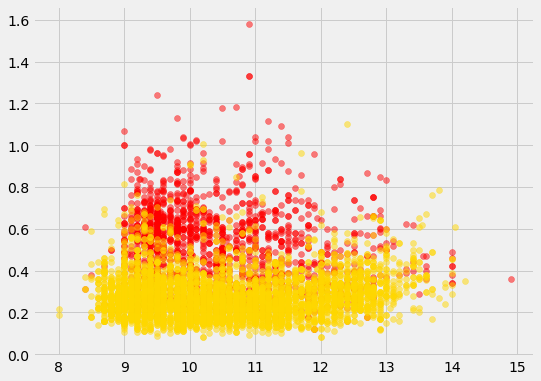

In [59]:
plots.figure(figsize=(8,6))
plots.scatter(red_wine.column('alcohol'), red_wine.column('volatile acidity'),
              color='red', alpha=0.5, label='Red Wine')
plots.scatter(white_wine.column('alcohol'), white_wine.column('volatile acidity'),
              color='gold', alpha=0.5, label='White Wine')
